# Machine Learning project on Australian weather dataset
## Steps:
### preparation
Load data
clean NA
plot and explore visually
Normalize to zero mean and unit variance and turn into numerical
Split into training, test and validation
### model
MLP for binary classification, namely rain tomorrow yes/no=1/0
Define an error function
### train and test




## Preparation

In [14]:
import numpy as np
import scipy as sp
import tensorflow as tf
import random as rn
import tensorflow.keras as keras

from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras import metrics, regularizers, optimizers

from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib as mpl


#load data
import pandas
filename = 'weatherAUS.csv'
data = pandas.read_csv(filename)
data = data.replace('NA', np.nan)
# drop the NaN
data = data.dropna(axis=0, how="any")
#only float
data=data.drop(columns=['Date','Location','WindGustDir','WindDir9am','WindDir3pm'])
data['RainToday']=data.RainToday.replace(to_replace=['No', 'Yes'], value=[0, 1])
data['RainTomorrow']=data.RainTomorrow.replace(to_replace=['No','Yes'],value=[0,1])
#divide into train, validation and test
y=data['RainTomorrow']
xrain=data['RainToday']
x=data.drop('RainTomorrow', axis=1)
x=x.drop('RainToday', axis=1)
x=preprocessing.scale(x)
x=pandas.DataFrame(x)
xrain=xrain.values.tolist()
x['17']=xrain

xtrain=x.iloc[:33852]
xtest=x.iloc[33852:]
ytrain=y.iloc[:33852]
ytest=y.iloc[33852:]
#normalize to zero mean and unit variance

#validation and test
x_test, x_val, y_test, y_val = train_test_split(xtest, ytest, test_size=0.4, random_state=41)








5939     0
5940     0
5942     0
5943     0
5944     0
5945     0
5946     0
5947     0
5948     0
5949     0
5950     0
5951     0
5952     0
5953     0
5954     0
5955     0
5956     0
5957     1
5958     0
5959     0
5960     1
5961     1
5962     0
5963     0
5964     0
5965     0
5966     0
5967     0
5968     0
5969     0
        ..
86568    0
86569    0
86570    0
86571    1
86572    1
86573    0
86574    0
86575    0
86576    0
86577    0
86578    1
86579    1
86580    0
86581    1
86582    0
86583    1
86584    1
86585    1
86586    0
86587    0
86588    1
86589    0
86590    1
86591    1
86592    0
86593    0
86594    0
86595    0
86596    0
86597    0
Name: RainTomorrow, Length: 33852, dtype: int64

# Neural Network for Binary Classification

In [22]:
def pipline(inp_dim,
            n_nod,
            act_fun = 'relu',
            out_act_fun = 'sigmoid',
            opt_method = 'Adam',
            cost_fun = 'binary_crossentropy',
            lr_rate = 0.01, 
            lambd = 0.0, 
            num_out = None):
    
    lays = [inp_dim] + n_nod
    
    main_input = Input(shape=(inp_dim,), dtype='float32', name='main_input')
    
    X = main_input
    for nod in n_nod:
        X = Dense(nod, 
                  activation = act_fun,
                  kernel_regularizer=regularizers.l2(lambd))(X)
        
    output = Dense(num_out, activation = out_act_fun )(X)
    
    method = getattr(optimizers, opt_method)
    
    model =  Model(inputs=[main_input], outputs=[output])
    model.compile(optimizer = method(lr = lr_rate, clipnorm = 1.0),
                  loss = cost_fun,
                  metrics=['accuracy', 'mse'])   
    
    return model

def stats_class(x = None, y = None, label = 'Training', modl = None):
    """
    input :  
             x = input
             y = output
             label = "Provided text string"
             modl = the model
             
    output : 
             sensitivity = fraction of correctly classified positive cases
             specificity = fraction of correctly classified negative cases
             accuracy = fraction of correctly classified cases
             loss = typically the cross-entropy error
    """
    
    def binary(y1):
        y1[y1>.5] = 1.
        y1[y1<= .5] = 0.        
        return y1

    y_pr = modl.predict(x, batch_size = x.shape[0], verbose=0).reshape(y.shape)
                
    nof_p, tp, nof_n, tn = [np.count_nonzero(k) for k in [y==1, y_pr[y==1.] > 0.5, y==0, y_pr[y==0.]<= 0.5]]
    
    #sens = tp / nof_p
    sens=0
    #spec = tn / nof_n
    spec=0
    acc = (tp + tn) / (len(y))
    loss = modl.evaluate(x, y , batch_size =  x.shape[0], verbose=0)
                
    A = ['Accuracy', 'Loss']
    B = [acc, loss[0]]
    
    print('\n','#'*10,'STATISTICS for {} Data'.format(label), '#'*10, '\n')
    for r in zip(A,B):
         print(*r, sep = '   ')
    return print('\n','#'*50)

# Training

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 18)]              0         
_________________________________________________________________
dense_16 (Dense)             (None, 6)                 114       
_________________________________________________________________
dense_17 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_18 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 7         
Total params: 205
Trainable params: 205
Non-trainable params: 0
_________________________________________________________________

 ########## STATISTICS for Training Data ########## 

Accuracy   1.0
Loss   0.00026327231898903847

 #########################

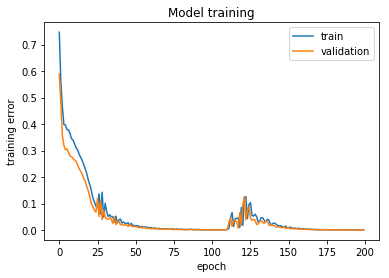

In [23]:
# Define the network, cost function and minimization method
INPUT = {'inp_dim': 18,         
         'n_nod': [6,6,6],                      # number of nodes in hidden layer
         'act_fun': 'tanh',                 # activation functions for the hidden layer
         'out_act_fun': 'sigmoid',          # output activation function
         'opt_method': 'Adam',               # minimization method
         'cost_fun': 'binary_crossentropy', # error function
         'lr_rate': 0.1,                    # learningrate
         'num_out' : 1 }              # if binary --> 1 |  regression--> num inputs | multi-class--> num of classes

# Get the model
model = pipline(**INPUT)

# Print a summary of the model
model.summary()

# Train the model
estimator = model.fit(xtrain, ytrain,
                      epochs = 200,                     # Number of epochs
                      validation_data=(x_val, y_val),  # We don't have any validation dataset!
                      batch_size = xtrain.shape[0],    # Use batch learning
                      #batch_size=25,                   
                      verbose = 0)



# Call the stats function to print out statistics for classification problems
stats_class(xtrain, ytrain, 'Training', model)
stats_class(x_val, y_val, 'Validation', model)

# Plot the learning curves
plt.plot(estimator.history['loss'])
plt.plot(estimator.history['val_loss'])
plt.title('Model training')
plt.ylabel('training error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc=0)
plt.show()


### Seems very accurate, I guess the reason for it is that it basically never rains in Australia and the dataset is big and considers a lot of parameters.

### Still a good exercise, especially for the preprocessing

### Can use all feedback possible :)
